link to data - https://drive.google.com/file/d/1TQNmoBGh1il841DlzSisJ6OV5KxR2m48/view?usp=drive_link

# Modelling

### Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)
import geopandas as gpd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.cluster import KMeans

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/datafest_hackathon/data_after_feature_engineering.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
#dropping unnecessary columns from data
df = df.drop(columns = ["Transaction ID","User ID", "Transaction Date and Time","IP Address"])

In [6]:
# Get the list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Payment Method', 'Country Code', 'Transaction Type', 'Device Type',
       'Browser Type', 'Operating System', 'Merchant Category',
       'User Occupation', 'User Gender', 'User Account Status',
       'Transaction Status', 'Transaction Time of Day',
       'User's Device Location', 'Transaction Currency', 'Transaction Purpose',
       'User's Email Domain', 'Transaction Authentication Method',
       'mail_type'],
      dtype='object')

In [7]:
# Apply Label Encoding to each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [8]:
df['Fraudulent Flag'] = df['Fraudulent Flag'].astype('int')

### Data Splitting

In [9]:
X,y = df.drop('Fraudulent Flag',axis = 1), df['Fraudulent Flag']

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y, random_state = 42,stratify = y, test_size = 0.35)

### Standardization

In [11]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

### Training & Validation

In the training and validation stage, we seek to create robust models 🔥🔥🔥 that are able to predict if a transaction is fraudulent or not.

### Machine Learning Approach

- For the machine learning section, the lightgbm classifier was used to train the data. The number of iterations were varied but they didn't seem to improve after changing them. It seemed to just have an accuracy of averagely 50%, it suggests that the model sees the data as a probabilistic data, i.e 50:50. This could be due to the data source. In my own opinion, the whole data seems to be simulated and it makes all data to just fit around the center in the feature space.

- The results of the machine learning model for accuracy, f1 score and balanced accuracy score are shown below.

In [12]:
#Testing various classifiers to see which gives the best accuracy score
model_results = pd.DataFrame(columns=["Model", "accuracy",'f1_score','balanced accuracy score'])
models = [
              ("lgbm_with_50_iterations", LGBMClassifier(random_state =  42,n_iterations = 50)),
              ("lgbm_with_100_iterations", LGBMClassifier(random_state =  42,n_iterations = 100)),
               ("lgbm_with_150_iterations", LGBMClassifier(random_state =  42,n_iterations = 150)),

          ]

In [13]:
for clf_name, clf in tqdm(models):
    clf.fit(xtrain, ytrain)
    predictions = clf.predict(xtest)
    accuracy = accuracy_score(ytest,predictions)
    f1 = f1_score(ytest,predictions)
    balanced = balanced_accuracy_score(ytest,predictions)

    new_row = {"Model": clf_name, "accuracy": accuracy, 'f1_score':f1,'balanced accuracy score':balanced}
    model_results = model_results.append(new_row, ignore_index=True)

  0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: n_iterations
[LightGBM] [Warning] Unknown parameter: n_iterations
[LightGBM] [Info] Number of positive: 1949939, number of negative: 1950061
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.385507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2978
[LightGBM] [Info] Number of data points in the train set: 3900000, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499984 -> initscore=-0.000063
[LightGBM] [Info] Start training from score -0.000063
[LightGBM] [Warning] Unknown parameter: n_iterations


 33%|███▎      | 1/3 [00:59<01:59, 59.85s/it]

[LightGBM] [Warning] Unknown parameter: n_iterations
[LightGBM] [Warning] Unknown parameter: n_iterations
[LightGBM] [Info] Number of positive: 1949939, number of negative: 1950061
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.706964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2978
[LightGBM] [Info] Number of data points in the train set: 3900000, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499984 -> initscore=-0.000063
[LightGBM] [Info] Start training from score -0.000063
[LightGBM] [Warning] Unknown parameter: n_iterations


 67%|██████▋   | 2/3 [02:00<01:00, 60.46s/it]

[LightGBM] [Warning] Unknown parameter: n_iterations
[LightGBM] [Warning] Unknown parameter: n_iterations
[LightGBM] [Info] Number of positive: 1949939, number of negative: 1950061
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.397019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2978
[LightGBM] [Info] Number of data points in the train set: 3900000, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499984 -> initscore=-0.000063
[LightGBM] [Info] Start training from score -0.000063
[LightGBM] [Warning] Unknown parameter: n_iterations


100%|██████████| 3/3 [03:00<00:00, 60.30s/it]


In [14]:
model_results.sort_values(by="accuracy", ascending=False)

,Model,accuracy,f1_score,balanced accuracy score
0,lgbm_with_50_iterations,0.50027,0.506988,0.500271
1,lgbm_with_100_iterations,0.50027,0.506988,0.500271
2,lgbm_with_150_iterations,0.50027,0.506988,0.500271


### Deep Learning Approach

- Deep learning is popular for its ability to efficiently derive insights from large data. A deep learning architecture was built to train the data. The input layer is the number of features in the training data(xtrain). Hidden layers were then added to the in the order 16,32,128 and an output layer of 1 for the predictions. The relu activation function was used, adam as the optimizer, binary_crossentropy as the loss and accuracy as the metric.

- After compiling, training and evaluating the model, it was inferred that the model is also performing at the same level as the lightgbn machine learning model at accuracy of 50%. It corroborates with what was said earlier that the data is likely having some discrepancies which keeps the model thinking of which direction to go in terms of prediction.

In [15]:
# Create a Sequential model
model = Sequential()

# Add input layer
model.add(Dense(units=16, activation='relu', input_dim=xtrain.shape[1]))

# Add one or more hidden layers
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=128, activation='relu'))

# Add the output layer (use 'sigmoid' for binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
model.fit(xtrain, ytrain, epochs=3, batch_size=128, validation_data=(xtest, ytest))

Epoch 1/3
30469/30469 [==============================] - 168s 5ms/step - loss: 0.6933 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.4997
Epoch 2/3
30469/30469 [==============================] - 161s 5ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4999
Epoch 3/3
30469/30469 [==============================] - 169s 6ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6933 - val_accuracy: 0.5000


In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

65625/65625 [==============================] - 181s 3ms/step - loss: 0.6928 - accuracy: 0.5000
Test Loss: 0.6928
Test Accuracy: 0.5000


### Unsupervised Learning Approach

- In the unsupervised learning approach, the Kmeans algorithm was used to understand the data better. Kmeans is an unsupervised learning approach which means the students are learning on their own without the help of a teacher.

- For the Kmeans model, the number of clusters used was 4, a higher number of clusters could be used but because of the memory or ram usage, 4 was used. After fitting the data and transorming, the output was in form of labels and in this case 4 is expected since the number of clusters while instantiating the model was 4.

- To check how well the model performed, the silhouette score was also obtained.

- A visual plot was created to see how well the Kmeans model performed. It appears that all the data are scattered around in no regular form, this makes the kmeans not efficient enough too.

In [18]:
kmeans = KMeans(random_state =42,n_clusters=4)

In [19]:
train_kmeans_predict = kmeans.fit_predict(xtrain)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(xtrain, train_kmeans_predict)

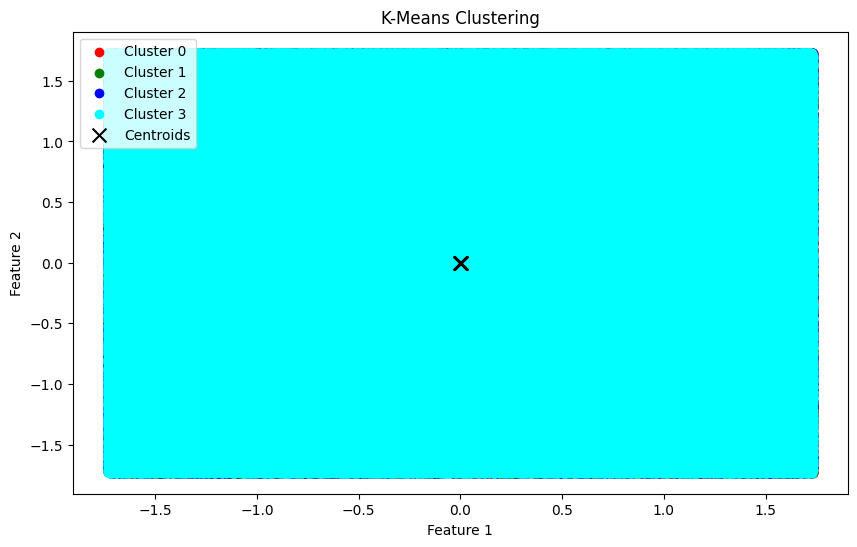

In [21]:
# Number of clusters
num_clusters = len(np.unique(train_kmeans_predict))

# Define colors for each cluster
colors = ['r', 'g','b','cyan']

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = xtrain[train_kmeans_predict == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label=f'Cluster {i}')

# Plot cluster centers (replace with your cluster centers)
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='k', marker='x', s=100, label='Centroids')

# Customize the plot
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
# plt.grid(True)

# Show the plot
plt.show()
